<a href="https://colab.research.google.com/github/Lu1sV1rus/EDP/blob/main/Diferencias%20Progresivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np                # Permite trabajar con arrays y funciones matemáticas
import matplotlib.pyplot as plt   # Permite crear gráficas
import pandas as pd               # Permite crear Dataframes
# as nos permite renombrar la libreria,
# un nombre corto nos sirve para invocar mas rapido a la libreria
print("Se han importado las librerías necesarias")

Se han importado las librerías necesarias


<font size=6> Diferencias progresivas</font>

---

<p> <font color="pink">Parámetros del problema: </font>

Ecuación: $$ du/dt = d^2u/dx^2$$ con $α^2 = 1 $

Dominio: $$0 < x < 1, t > 0$$
Frontera: $$u(0, t) = 0, u(1, t) = 0$$
Inicial: $$u(x, 0) = sen(π * x)$$
Solución Exacta: $$u(x, t) = \exp(-π^2 t) * \sin(π x)$$ </p>

In [45]:
# Parámetros
alfa = 1.0        # Coeficiente de difusividad térmica (alfa^2 = 1 en la ecuación)
L = 1.0           # Longitud del dominio espacial
T_final = 0.5     # Tiempo final de la simulación
h = 0.1           # Paso espacial (delta x)
print(f"Parámetros iniciales: alfa={alfa}, L={L}, TF={T_final}, H={h}")

# Creación de la malla espacial
Nx = int(L/h) + 1 # Número total de puntos, incluyendo fronteras (0.0 a 1.0)
x = np.linspace(0, L, Nx) # Vector de posiciones espaciales
print(f"Número de puntos espaciales (Nx): {Nx}")
print(f"Paso espacial (h): {h}")
print(f"Puntos x: {x}")

# Solución Analítica para comparación
def solucion_exacta(x, t):
    """Calcula la solución exacta en (x, t)"""
    return np.exp(-(np.pi**2) * t) * np.sin(np.pi * x)

Parámetros iniciales: alfa=1.0, L=1.0, TF=0.5, H=0.1
Número de puntos espaciales (Nx): 11
Paso espacial (h): 0.1
Puntos x: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


<font size=5> Método explícito de diferencias finitas para la Ecuación de Calor.</font>

---

<p><font color="tomato"> Parámetros: </font>

$k$ (float): Paso temporal ($δ t$)

$T_f$, $f=final$ (float): Tiempo total de simulación.

$h$ (float): Paso espacial.

$alfa$ (float): Coeficiente de difusividad.

$x$ (np.array): Vector de puntos espaciales. </p>


<p><font color="tomato"> Retorna:</font>


$U$ (np.array): Solución numérica en $T_f$.

$r$ (float): Parámetro de estabilidad $r$.

$Nt$ (int): Número de pasos de tiempo.
</p>

In [47]:
# Método Explícito
# Función de Simulación Numérica
def metodo_explicito(k, T_final, h, alfa, x):
    """Calcula la solución por el Método Explícito (ME)"""

    # Calcular parámetros
    r = (alfa**2) * k / (h**2)
    Nt = int(T_final / k)

    # Condición Inicial
    U = np.sin(np.pi * x)
    U[0] = 0.0  # Condición de frontera u(0, t) = 0
    U[-1] = 0.0 # Condición de frontera u(1, t) = 0

    # Iteración en el tiempo
    for n in range(Nt):
        # Crear copia para almacenar el nuevo paso temporal U^(n+1)
        U_nuevo = U.copy()                   # U_nuevo = UN = (n+1)


        # Actualizar cada punto interno
        # Fórmula de actualización (solo en puntos interiores: i=1 hasta Nx-2)
        # U_i^(n+1) = U_i^n + r * (U_{i+1}^n - 2*U_i^n + U_{i-1}^n)
        for i in range(1, len(x) - 1):
            U_nuevo[i] = U[i] + r * (U[i+1] - 2*U[i] + U[i-1])

        U = U_nuevo # Actualizar la solución

    return U, r, Nt

In [34]:
print("\n=== CASO (a) - ESTABLE ===")
k_a = 0.0005
U_a, r_a, Nt_a = metodo_explicito(k_a, T_final, h, alfa, x)

print(f"Paso temporal (k): {k_a}")
print(f"Parámetro de estabilidad r_a = {r_a:.4f}")
print(f"Número de pasos de tiempo (Nt_a): {Nt_a}")
print(f"r_a <= 0.5 (0.05 <= 0.5): ¡ESTABLE!")


=== CASO (a) - ESTABLE ===
Paso temporal (k): 0.0005
Parámetro de estabilidad r_a = 0.0500
Número de pasos de tiempo (Nt_a): 1000
r_a <= 0.5 (0.05 <= 0.5): ¡ESTABLE!


In [36]:
print("\n=== CASO (b) - INESTABLE ===")
k_b = 0.01
U_b, r_b, Nt_b = metodo_explicito(k_b, T_final, h, alfa, x)

print(f"Paso temporal (k): {k_b}")
print(f"Parámetro de estabilidad r_b = {r_b:.4f}")
print(f"Número de pasos de tiempo (Nt_b): {Nt_b}")
print(f"r_b <= 0.5 (1.00 <= 0.5): ¡INESTABLE!")


=== CASO (b) - INESTABLE ===
Paso temporal (k): 0.01
Parámetro de estabilidad r_b = 1.0000
Número de pasos de tiempo (Nt_b): 50
r_b <= 0.5 (1.00 <= 0.5): ¡INESTABLE!


In [119]:
# Calcular la solución exacta en t = T_final = 0.5
U_exacta = solucion_exacta(x, T_final)

# Crear el DataFrame para la tabla comparativa
data = {
    'xi': x,
    'u(xi, 0.5) Exacta': U_exacta,
    'k=0.0005 Estable': U_a,
    '|Error Estable|': np.abs(U_exacta - U_a),
    'k=0.01 Inestable': U_b,
    '|Error Inestable|': np.abs(U_exacta - U_b)
}

df = pd.DataFrame(data)

# Le damos un formato, para que sea mas facil de leer
pd.set_option('display.float_format', lambda x: f'{x:,.8f}' if x != 0.0 else '0')
df_formateado = df.copy()

# Formatear la salida para coincidir con la precisión del ejemplo
pd.set_option('display.float_format', lambda x: f'{x:,.8f}' if x != 0.0 else '0')
df_formateado = df.copy()

# Ajustar formato de columnas específicas para mayor claridad en grandes números
for col in ['u(xi, 0.5) Exacta', 'k=0.0005 Estable', '|Error Estable|']:
    df_formateado[col] = df_formateado[col].apply(lambda val: f'{val:,.8f}')

for col in ['k=0.01 Inestable', '|Error Inestable|']:
    df_formateado[col] = df_formateado[col].apply(lambda val: f'{val:,.5e}' if abs(val) > 1e-4 else '0')

print("\n\n=== COMPARACIÓN TABULAR EN t = 0.5 ===")
df_formateado



=== COMPARACIÓN TABULAR EN t = 0.5 ===


,xi,"u(xi, 0.5) Exacta",k=0.0005 Estable,|Error Estable|,k=0.01 Inestable,|Error Inestable|
0,0,0.00000000,0.00000000,0.00000000,0,0
1,0.10000000,0.00222241,0.00228652,0.00006411,-3.02663e+04,3.02663e+04
2,0.20000000,0.00422728,0.00434922,0.00012194,6.05881e+04,6.05881e+04
3,0.30000000,0.00581836,0.00598619,0.00016783,-8.98628e+04,8.98628e+04
4,0.40000000,0.00683989,0.00703719,0.00019730,1.15226e+05,1.15226e+05
5,0.50000000,0.00719188,0.00739934,0.00020745,-1.32328e+05,1.32328e+05
6,0.60000000,0.00683989,0.00703719,0.00019730,1.36479e+05,1.36479e+05
7,0.70000000,0.00581836,0.00598619,0.00016783,-1.24251e+05,1.24251e+05
8,0.80000000,0.00422728,0.00434922,0.00012194,9.49766e+04,9.49766e+04
9,0.90000000,0.00222241,0.00228652,0.00006411,-5.15195e+04,5.15196e+04


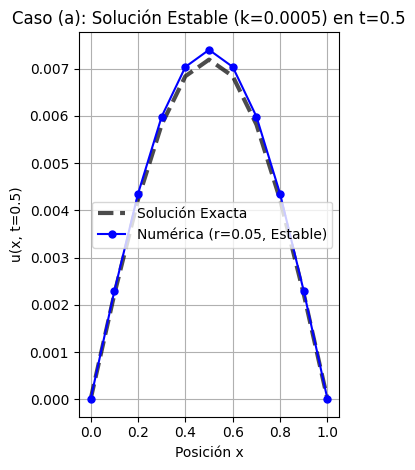

In [120]:
# Gráfica para el caso A (Estable)
plt.subplot(1, 2, 1)
plt.plot(x, U_exacta, label='Solución Exacta', color='black', linestyle='--', linewidth=3, alpha=0.7)
plt.plot(x, U_a, label=f'Numérica (r={r_a:.2f}, Estable)', color='blue', marker='o', linestyle='-', markersize=5)
plt.title(f'Caso (a): Solución Estable (k={k_a}) en t={T_final}')
plt.xlabel('Posición x')
plt.ylabel('u(x, t=0.5)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

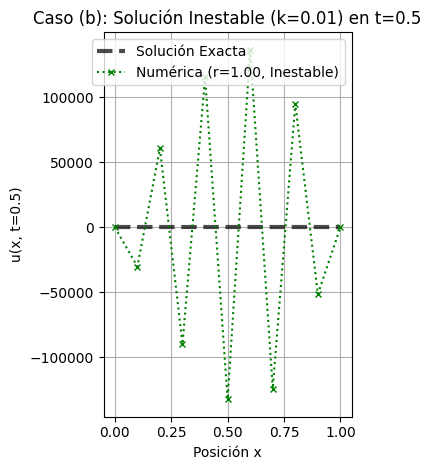

In [121]:
# Gráfica para el caso B (Inestable)
plt.subplot(1, 2, 2)
plt.plot(x, U_exacta, label='Solución Exacta', color='black', linestyle='--', linewidth=3, alpha=0.7)
plt.plot(x, U_b, label=f'Numérica (r={r_b:.2f}, Inestable)', color='green', marker='x', linestyle=':', markersize=5)
plt.title(f'Caso (b): Solución Inestable (k={k_b}) en t={T_final}')
plt.xlabel('Posición x')
plt.ylabel('u(x, t=0.5)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

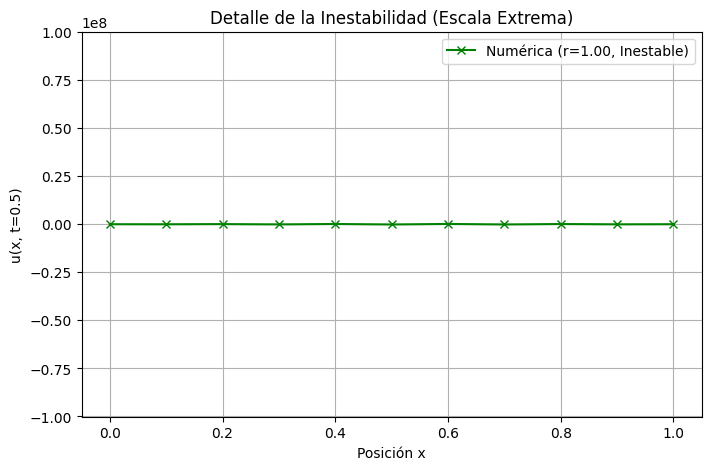

In [122]:
# Gráfico para visualizar la inestabilidad extrema (Caso b)
plt.figure(figsize=(8, 5))
plt.plot(x, U_b, label=f'Numérica (r={r_b:.2f}, Inestable)', color='green', marker='x')
plt.title('Detalle de la Inestabilidad (Escala Extrema)')
plt.xlabel('Posición x')
plt.ylabel('u(x, t=0.5)')
plt.ylim(np.min(U_b) - 1e8, np.max(U_b) + 1e8) # Ajustar para ver la oscilación
plt.grid()
plt.legend()
plt.show()

In [123]:
df_formateado

,xi,"u(xi, 0.5) Exacta",k=0.0005 Estable,|Error Estable|,k=0.01 Inestable,|Error Inestable|
0,0,0.00000000,0.00000000,0.00000000,0,0
1,0.10000000,0.00222241,0.00228652,0.00006411,-3.02663e+04,3.02663e+04
2,0.20000000,0.00422728,0.00434922,0.00012194,6.05881e+04,6.05881e+04
3,0.30000000,0.00581836,0.00598619,0.00016783,-8.98628e+04,8.98628e+04
4,0.40000000,0.00683989,0.00703719,0.00019730,1.15226e+05,1.15226e+05
5,0.50000000,0.00719188,0.00739934,0.00020745,-1.32328e+05,1.32328e+05
6,0.60000000,0.00683989,0.00703719,0.00019730,1.36479e+05,1.36479e+05
7,0.70000000,0.00581836,0.00598619,0.00016783,-1.24251e+05,1.24251e+05
8,0.80000000,0.00422728,0.00434922,0.00012194,9.49766e+04,9.49766e+04
9,0.90000000,0.00222241,0.00228652,0.00006411,-5.15195e+04,5.15196e+04


<font size=5>Razón de las Diferencias Obtenidas</font>

---

<p><font color="skyblue"> Caso (a) - Estable:</font>

<font color="skyblue">Resultado:</font>

El valor de $r=0.05$ garantiza la estabilidad.

Las soluciones numérica y exacta son casi idénticas.

<font color="skyblue">Diferencia:</font>

La pequeña diferencia observada (del orden de $10^{-5}$ a $10^{-4}$) es el error de truncamiento inherente al método de diferencias finitas, que aproxima derivadas mediante diferencias discretas.

Este error es tolerable y no se amplifica. </p>


<p><font color="lightgreen"> Caso (b) - Inestable:</font>

<font color="lightgreen">Resultado:</font>

El valor de $r=1.0$ viola la condición de estabilidad ($r \le 0.5$).

La solución numérica diverge catastróficamente.

<font color="lightgreen">Diferencia:</font>

La tabla muestra valores gigantescos (del orden de $10^8$), que oscilan en signo. Esto es la manifestación de la inestabilidad numérica.

El error de redondeo (pequeñas imprecisiones de la computadora) o el error de truncamiento se amplifican exponencialmente en cada paso de tiempo, haciendo que la solución no tenga ninguna relación con la solución física de la ecuación de calor.
</p>